<a href="https://colab.research.google.com/github/CARC2806/FM/blob/main/A00833458_1st_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Alpaca API installation
! python3 -m pip install alpaca-py
! pip install sweetviz
#Libraries import
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 81.8 MB/s eta 0:00:00


# **1. Extract Information**

## **1.1 Structured Data**

### **1.1.2 Text Format: CSV**

In [37]:
#This file contains the historical data of the TGT stock from august 2014 to august 2019
tgt = pd.read_csv('/content/TGT.csv')
#This file contains the historical data of the US unenployment rate from august 2014 to july 2024
unrate = pd.read_csv('/content/UNRATE.csv')

## **1.2 Semi-structured Data**

###**1.2.1 JSON**

In [38]:
#This code retrieves the historical data of the TGT stock from august 2019 to july 2024
url = "https://data.alpaca.markets/v2/stocks/bars"
headers = {
    "accept": "application/json",
    "APCA-API-KEY-ID": "PKEPZ4NG2SB8CJ2VV36E",
    "APCA-API-SECRET-KEY": "HAvkenzFiTNLBVg8dxHVO3LoxwgWFNWy4W1K3Z6U"
}
params = {
    "symbols": "TGT",  # Target
    "timeframe": "1Month",  # Monthly data
    "start": "2019-08-21T00:00:00Z",  # Start date
    "end": "2024-07-22T00:00:00Z",  # End date
    "limit": 10000,
    "adjustment": "raw",
    "feed": "sip",
    "sort": "asc"
}
response = requests.get(url, headers=headers, params=params)
data = response.json()

## **1.3 E/R Diagram**

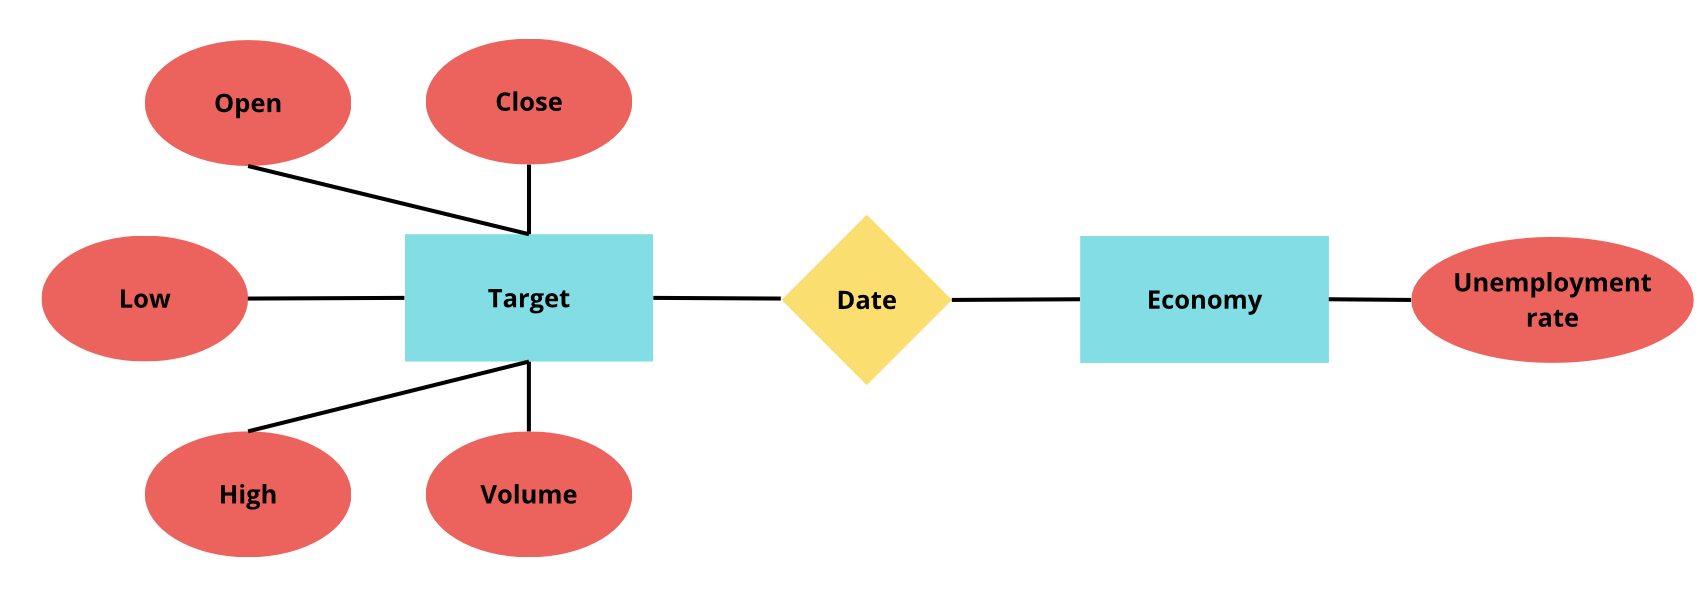

# **2. Processing Data**

## **2.1 Create Data Frame**

In [39]:
#Creates a df from the dictionary from Alpaca
bars = data["bars"]
target = pd.DataFrame(bars["TGT"])

In [40]:
#tgt and unrate where already data frames as they were opened as such with Pandas
print(type(target))
print(type(tgt))
print(type(unrate))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## **2.2 Merge**

In [41]:
#Rename the columns so that the three df have Date in common and we can merge them.
unrate.rename(columns={
    'DATE': 'Date',
}, inplace=True)
target.rename(columns={
    't': 'Date',
    'o': 'Open',
    'h': 'High',
    'l': 'Low',
    'c': 'Close',
    'v': 'Volume'
}, inplace=True)

In [42]:
#This code merges the two target variables so that we have one df that contains the historical data from 2014 to 2024
target = pd.concat([tgt, target], ignore_index=True)
target.sort_values(by='Date', inplace=True)
target

,Date,Open,High,Low,Close,Adj Close,Volume,n,vw
0,2014-08-01,59.32,61.50,57.26,60.07,45.24,108249800,NaN,NaN
1,2014-09-01,60.28,64.65,59.98,62.68,47.63,84071300,NaN,NaN
2,2014-10-01,62.68,63.45,58.72,61.82,46.97,97223700,NaN,NaN
3,2014-11-01,61.82,74.76,60.98,74.00,56.23,126513800,NaN,NaN
4,2014-12-01,73.34,76.65,71.98,75.91,58.12,96597700,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115,2024-03-01T05:00:00Z,153.24,177.40,150.09,177.21,NaN,101509053,1450698.00,167.25
116,2024-04-01T04:00:00Z,178.77,181.86,160.42,160.98,NaN,64789235,1066634.00,168.50
117,2024-05-01T04:00:00Z,160.83,165.65,139.98,156.16,NaN,102487775,1503808.00,153.17
118,2024-06-01T04:00:00Z,152.09,154.49,139.38,148.04,NaN,81621103,1149969.00,146.70


In [43]:
#This code takes only the date for target so that we don't have different formats
target['Date'] = target['Date'].str.split('T').str[0]
#This code turns date columns in to date type so that we can merge the df later
target['Date'] = pd.to_datetime(target['Date']).dt.date
unrate['Date'] = pd.to_datetime(unrate['Date']).dt.date

**In the following lines, referential integrity is ensured because when using the inner method of pd.merge, only the data with indices that are present in both DataFrames are retained.**

In [44]:
#This code merges the df target and the unrate
tgt_unrate = pd.merge(target, unrate, on='Date', how='inner')
tgt_unrate

,Date,Open,High,Low,Close,Adj Close,Volume,n,vw,UNRATE
0,2014-08-01,59.32,61.50,57.26,60.07,45.24,108249800,NaN,NaN,6.10
1,2014-09-01,60.28,64.65,59.98,62.68,47.63,84071300,NaN,NaN,5.90
2,2014-10-01,62.68,63.45,58.72,61.82,46.97,97223700,NaN,NaN,5.70
3,2014-11-01,61.82,74.76,60.98,74.00,56.23,126513800,NaN,NaN,5.80
4,2014-12-01,73.34,76.65,71.98,75.91,58.12,96597700,NaN,NaN,5.60
...,...,...,...,...,...,...,...,...,...,...
115,2024-03-01,153.24,177.40,150.09,177.21,NaN,101509053,1450698.00,167.25,3.80
116,2024-04-01,178.77,181.86,160.42,160.98,NaN,64789235,1066634.00,168.50,3.90
117,2024-05-01,160.83,165.65,139.98,156.16,NaN,102487775,1503808.00,153.17,4.00
118,2024-06-01,152.09,154.49,139.38,148.04,NaN,81621103,1149969.00,146.70,4.10


##**2.3 Indexing Columns**

### **2.3.1 Slicing data**

In [45]:
#Slice the columns to select only the relevant and complete columns
tgt_unrate = tgt_unrate.loc[:, ['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'UNRATE']]

### **2.3.2 Set Index**

In [46]:
tgt_unrate.set_index('Date', inplace=True)
tgt_unrate.index = pd.to_datetime(tgt_unrate.index)

# **3. Cleaning Data**

## **3.1 Data Profiling Report**

The Data profiling report is at the end of this page because it doesn't make sense to do it before finishing the following parts of the code.
### **Check 3.1* as the last section of the code**

## **3.2 Data Wrangling**

### **3.2.1 Correct Data Types**

In [47]:
#This codes checks the data types in the df.
tgt_unrate.dtypes
#The data types are correct.

,0
Open,float64
Close,float64
High,float64
Low,float64
Volume,int64
UNRATE,float64


### **3.2.2 Handle Missing Values**

In [48]:
#This code checks for missing values
missing = tgt_unrate.isnull().any()
print(missing)
#The df doesn't have missing values, in the slicing part of the code I selected only the values that had info for
#all the dates in the df

Open      False
Close     False
High      False
Low       False
Volume    False
UNRATE    False
dtype: bool


### **3.2.3 Handle Duplicate Values**

In [49]:
#This code checks for duplicated rows and adds them if it finds any
total_duplicates = tgt_unrate.duplicated().sum()
print(f"Total number of duplicate rows: {total_duplicates}")
#There are no duplicate rows

Total number of duplicate rows: 0


### **3.2.4 Validate Continous Values**

Normal Distribution

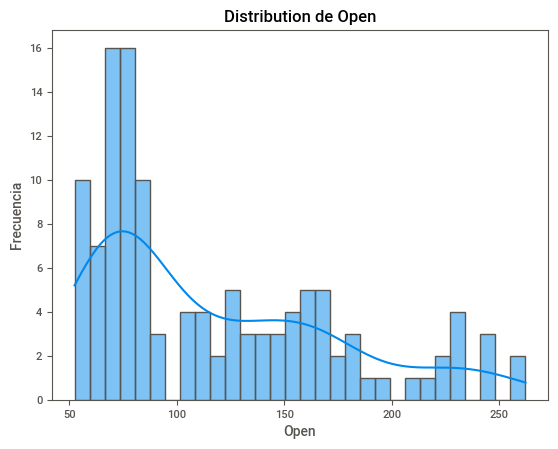

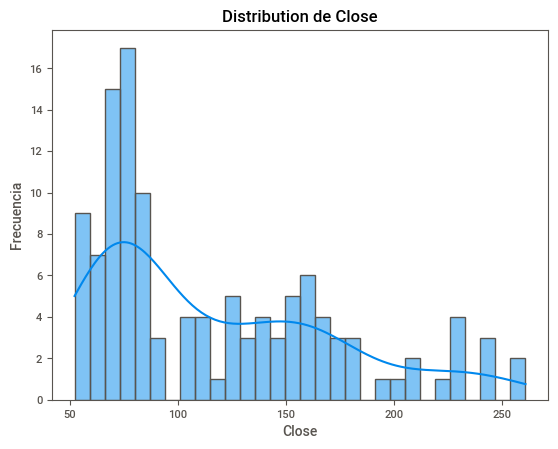

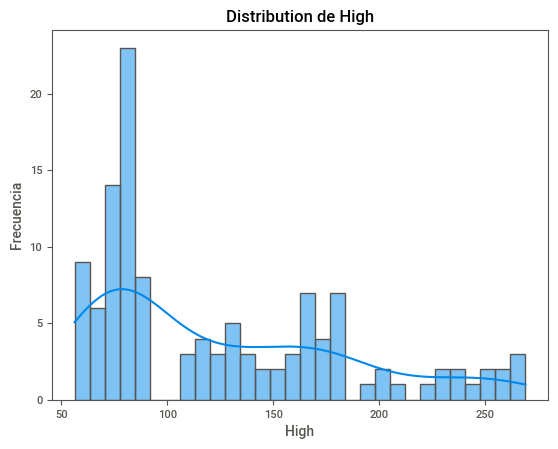

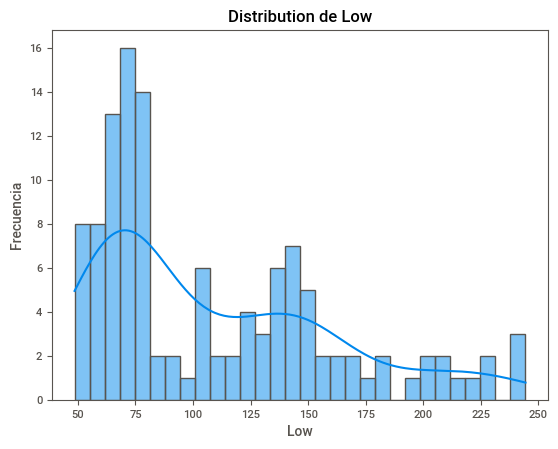

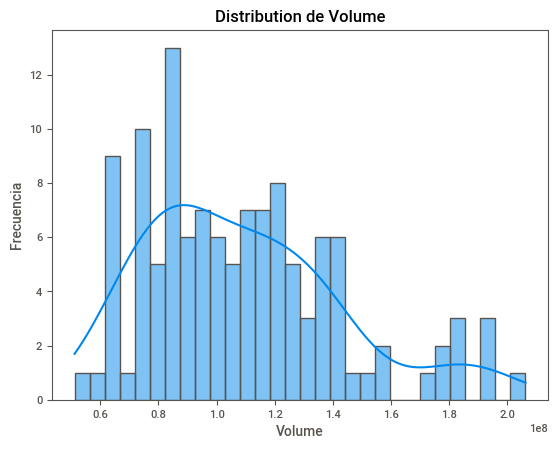

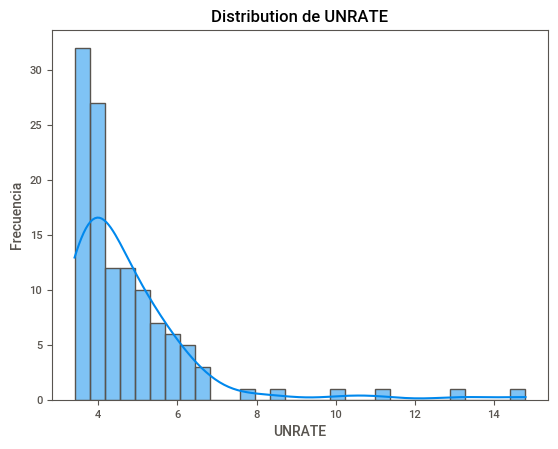

In [50]:
# List of rows to analyze
columns_to_analyze = ['Open', 'Close', 'High', 'Low', 'Volume', 'UNRATE']
# Makes a normal distribution chart for each column to analyze
for column in columns_to_analyze:
    sns.histplot(tgt_unrate[column], bins=30, kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Outliers

In [51]:
#Checks for outliers in the columns to analyze
for column in columns_to_analyze:
    Q1 = tgt_unrate[column].quantile(0.25)
    Q3 = tgt_unrate[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = tgt_unrate[(tgt_unrate[column] < lower_bound) | (tgt_unrate[column] > upper_bound)]
    print(f"Outliers en {column}:")
    if not outliers.empty:
        print(outliers[[column]])
    else:
        print("No se encontraron outliers en esta columna.")

Outliers en Open:
No se encontraron outliers en esta columna.
Outliers en Close:
No se encontraron outliers en esta columna.
Outliers en High:
No se encontraron outliers en esta columna.
Outliers en Low:
No se encontraron outliers en esta columna.
Outliers en Volume:
               Volume
Date                 
2017-03-01  206344800
2017-06-01  195470600
2017-11-01  195179700
Outliers en UNRATE:
            UNRATE
Date              
2020-04-01   14.80
2020-05-01   13.20
2020-06-01   11.00
2020-07-01   10.20
2020-08-01    8.40
2020-09-01    7.80


Unbalanced Values

In [52]:
#Checks for the most frecuent values and their frecuency
for column in columns_to_analyze:
    value_counts = tgt_unrate[column].value_counts(normalize=True).sort_values(ascending=False)
    print(f"Top 5 valores más frecuentes en {column}:")
    print(value_counts.head(5))
    print("\n")

Top 5 valores más frecuentes en Open:
Open
80.60   0.02
78.35   0.01
61.82   0.01
73.34   0.01
76.11   0.01
Name: proportion, dtype: float64


Top 5 valores más frecuentes en Close:
Close
106.91   0.02
64.48    0.01
61.82    0.01
74.00    0.01
75.91    0.01
Name: proportion, dtype: float64


Top 5 valores más frecuentes en High:
High
78.70   0.02
80.17   0.01
74.76   0.01
76.65   0.01
77.75   0.01
Name: proportion, dtype: float64


Top 5 valores más frecuentes en Low:
Low
57.26   0.01
59.98   0.01
58.72   0.01
60.98   0.01
71.98   0.01
Name: proportion, dtype: float64


Top 5 valores más frecuentes en Volume:
Volume
108249800   0.01
84071300    0.01
97223700    0.01
126513800   0.01
96597700    0.01
Name: proportion, dtype: float64


Top 5 valores más frecuentes en UNRATE:
UNRATE
3.60   0.12
3.80   0.10
3.70   0.07
3.50   0.06
4.00   0.06
Name: proportion, dtype: float64




### **3.2.5 Validate Categorical Values**

In [53]:
#This code checks for categorical values
categorical_columns = tgt_unrate.select_dtypes(include=['category']).columns
print("Columnas categóricas:", categorical_columns)
#In this df there are no categorical values

Columnas categóricas: Index([], dtype='object')


In [54]:
#This code will create categorical values from the years in which the data was collected.
# Determine the range of years
start_year = tgt_unrate.index.year.min()
end_year = tgt_unrate.index.year.max()

# Create a range of years with 2-year intervals
bins = list(range(start_year, end_year + 2, 2))+ [end_year + 1]

# Create labels for each interval
labels = [f'{year}-{year+1}' for year in bins[:-1]]

# Categorize the dates
tgt_unrate['Year_Category'] = pd.cut(tgt_unrate.index.year, bins=bins, labels=labels, right=False)

In [55]:
#This code prints the name of the new categorical column and proves that the column is categorical
categorical_columns = tgt_unrate.select_dtypes(include=['category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Year_Category'], dtype='object')


# **4. Feature Engineering**

## **4.1 Identify Correlations**

In [56]:
# Exclude non-numeric columns (like 'Year_Category') before calculating the correlation matrix
numeric_tgt = tgt_unrate.select_dtypes(include=['number'])

# Now calculate the correlation matrix
correlation_matrix = numeric_tgt.corr()
print(correlation_matrix)

        Open  Close  High   Low  Volume  UNRATE
Open    1.00   0.98  0.99  0.99   -0.40   -0.03
Close   0.98   1.00  0.99  0.99   -0.44    0.03
High    0.99   0.99  1.00  0.99   -0.39   -0.00
Low     0.99   0.99  0.99  1.00   -0.47    0.01
Volume -0.40  -0.44 -0.39 -0.47    1.00    0.01
UNRATE -0.03   0.03 -0.00  0.01    0.01    1.00


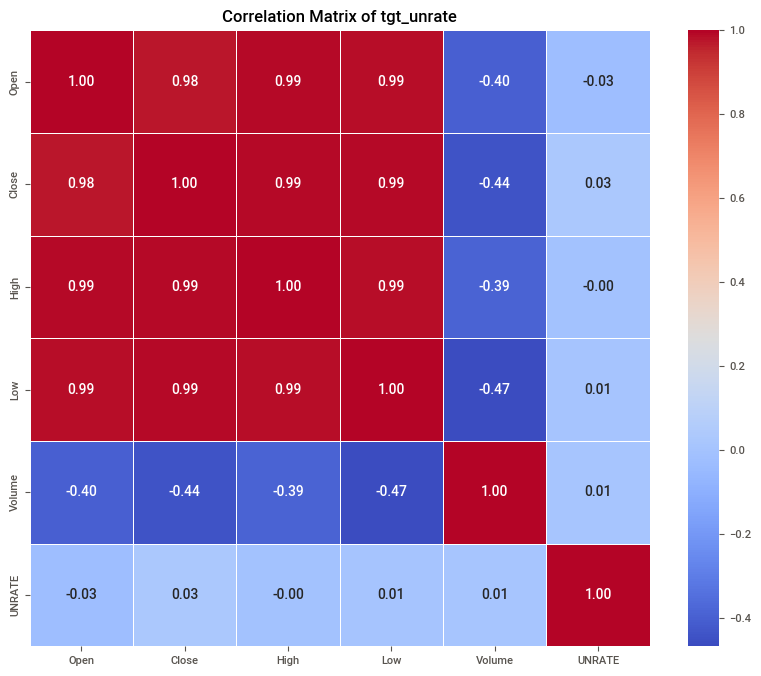

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of tgt_unrate')
plt.show()

## **4.2 Constructing Brand New Features**

###**4.2.1 Mathematical computations**

In [58]:
pd.options.display.float_format = '{:.2f}'.format
means = numeric_tgt.mean()
max = numeric_tgt.max()
min = numeric_tgt.min()
std = numeric_tgt.std()
print("Means:\n", means)
print("\nMax:\n", max)
print("\nMin:\n", min)
print("\nStandard Deviations:\n", std)

Means:
 Open           117.10
Close          117.48
High           124.74
Low            109.40
Volume   109007729.68
UNRATE           4.75
dtype: float64

Max:
 Open           262.08
Close          261.05
High           268.98
Low            244.40
Volume   206344800.00
UNRATE          14.80
dtype: float64

Min:
 Open           52.53
Close          52.29
High           56.29
Low            48.56
Volume   51107787.00
UNRATE          3.40
dtype: float64

Standard Deviations:
 Open           56.27
Close          55.37
High           59.56
Low            51.54
Volume   34181654.53
UNRATE          1.74
dtype: float64


###**4.2.2 Date and Time methods**

In [59]:
tgt_unrate['Year'] = tgt_unrate.index.year
tgt_unrate['Month'] = tgt_unrate.index.month
tgt_unrate

,Open,Close,High,Low,Volume,UNRATE,Year_Category,Year,Month
Date,,,,,,,,,
2014-08-01,59.32,60.07,61.50,57.26,108249800,6.10,2014-2015,2014,8
2014-09-01,60.28,62.68,64.65,59.98,84071300,5.90,2014-2015,2014,9
2014-10-01,62.68,61.82,63.45,58.72,97223700,5.70,2014-2015,2014,10
2014-11-01,61.82,74.00,74.76,60.98,126513800,5.80,2014-2015,2014,11
2014-12-01,73.34,75.91,76.65,71.98,96597700,5.60,2014-2015,2014,12
...,...,...,...,...,...,...,...,...,...
2024-03-01,153.24,177.21,177.40,150.09,101509053,3.80,2024-2025,2024,3
2024-04-01,178.77,160.98,181.86,160.42,64789235,3.90,2024-2025,2024,4
2024-05-01,160.83,156.16,165.65,139.98,102487775,4.00,2024-2025,2024,5


###**4.2.3 Common Operations**

In [60]:
filtered_100 = tgt_unrate[tgt_unrate['Close'] < 100]
print(filtered_100)

             Open  Close   High   Low     Volume  UNRATE Year_Category  Year  \
Date                                                                           
2014-08-01  59.32  60.07  61.50 57.26  108249800    6.10     2014-2015  2014   
2014-09-01  60.28  62.68  64.65 59.98   84071300    5.90     2014-2015  2014   
2014-10-01  62.68  61.82  63.45 58.72   97223700    5.70     2014-2015  2014   
2014-11-01  61.82  74.00  74.76 60.98  126513800    5.80     2014-2015  2014   
2014-12-01  73.34  75.91  76.65 71.98   96597700    5.60     2014-2015  2014   
...           ...    ...    ...   ...        ...     ...           ...   ...   
2019-04-01  80.61  77.42  83.65 74.73   92402600    3.70     2018-2019  2019   
2019-05-01  77.80  80.45  82.25 70.03  140085400    3.60     2018-2019  2019   
2019-06-01  80.60  86.61  89.15 80.56   93656300    3.60     2018-2019  2019   
2019-07-01  87.55  86.40  89.51 85.68   84269600    3.70     2018-2019  2019   
2020-03-01 103.38  92.97 112.20 90.52  1

###**4.2.4 Encoding categorical values**

One hot encoding

In [61]:
print(tgt_unrate['Year_Category'].dtype)

category


In [62]:
tgt_one_hot = pd.get_dummies(tgt_unrate, columns=['Year_Category'], prefix='Year')

In [63]:
print(tgt_one_hot.dtypes)

Open              float64
Close             float64
High              float64
Low               float64
Volume              int64
UNRATE            float64
Year                int32
Month               int32
Year_2014-2015       bool
Year_2016-2017       bool
Year_2018-2019       bool
Year_2020-2021       bool
Year_2022-2023       bool
Year_2024-2025       bool
dtype: object


# **3.1* Data Profiling Report**

In [64]:
# Generate a Sweetviz report
report = sv.analyze(tgt_unrate)
report.show_html("sweetviz_report.html")  # Save report to HTML file

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



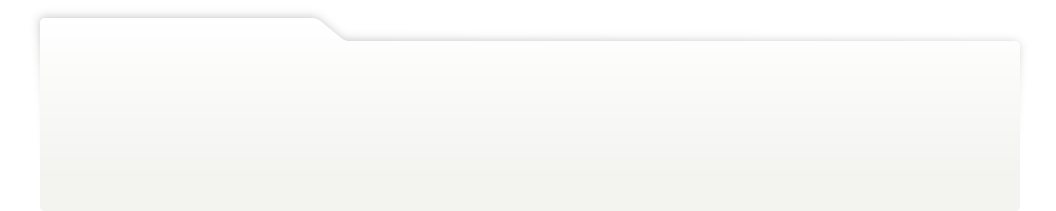
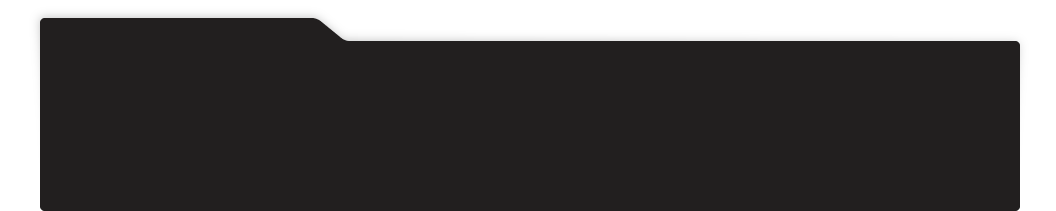
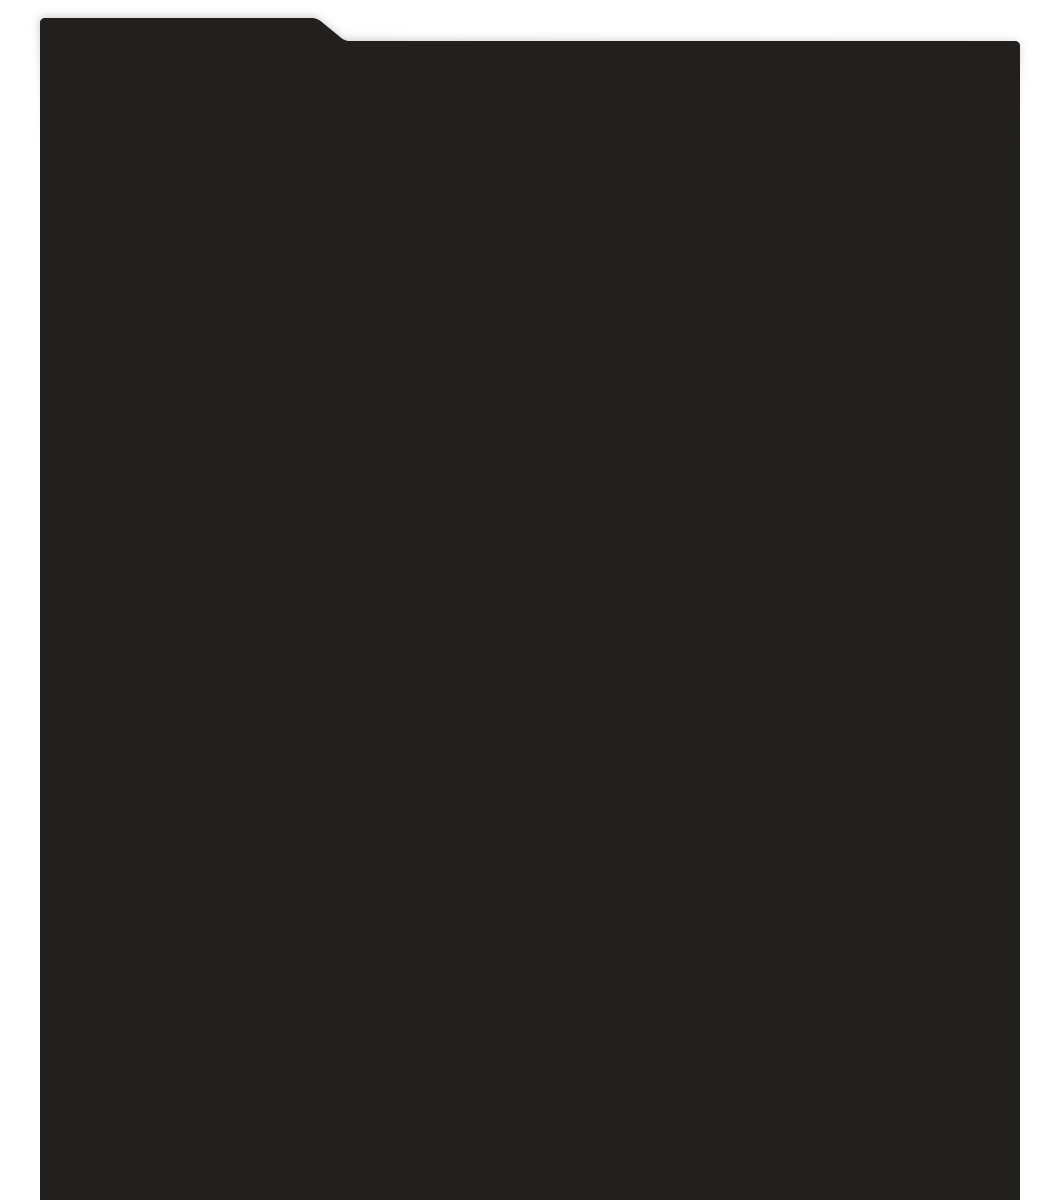
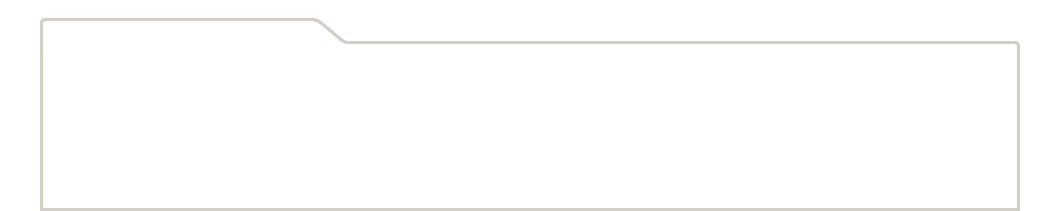
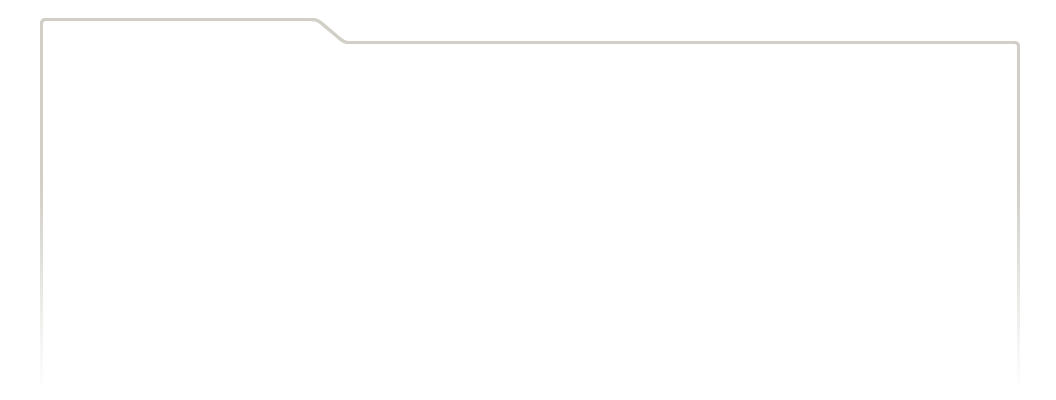
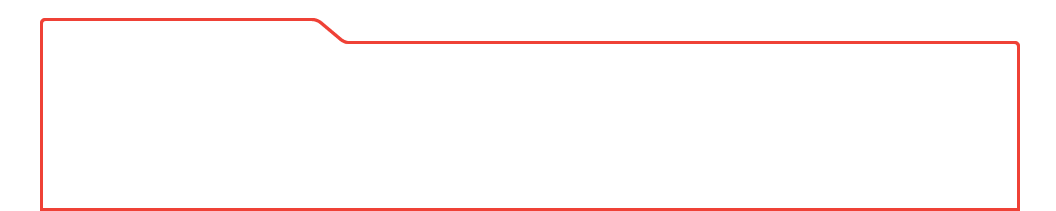
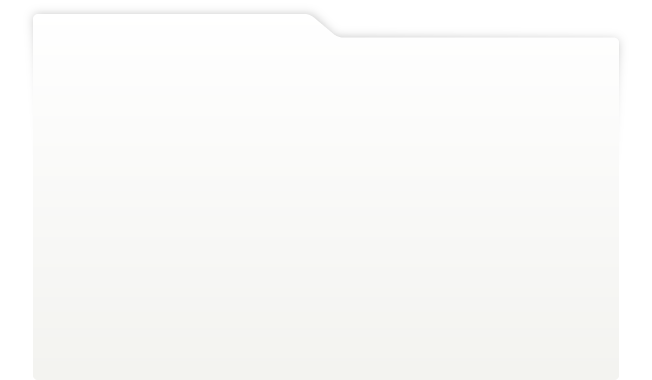
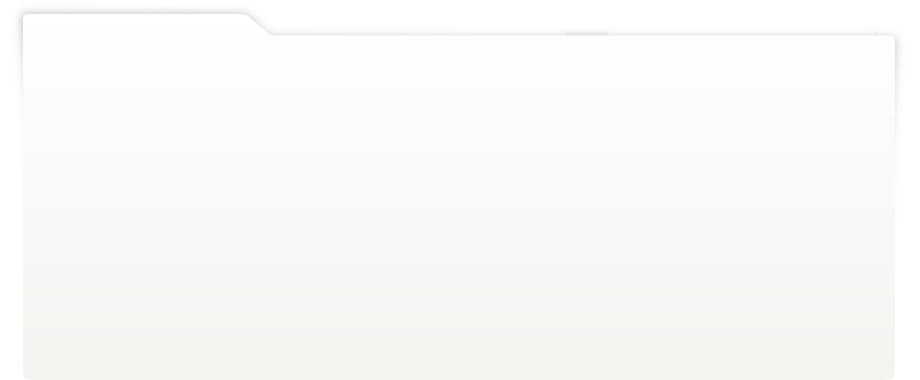
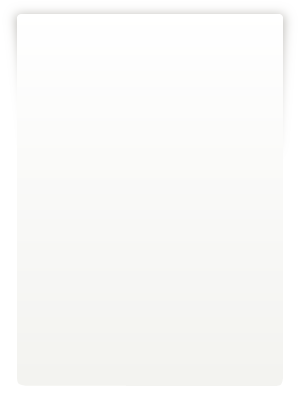
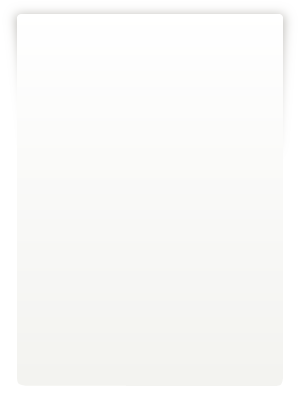
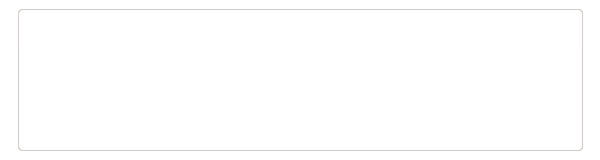
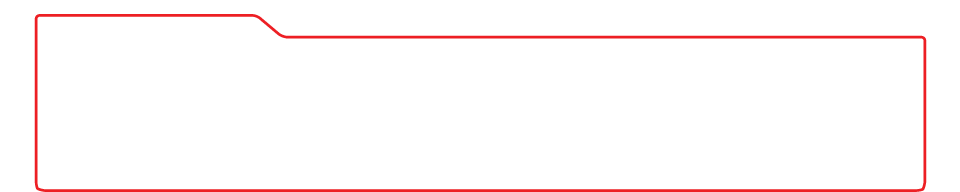
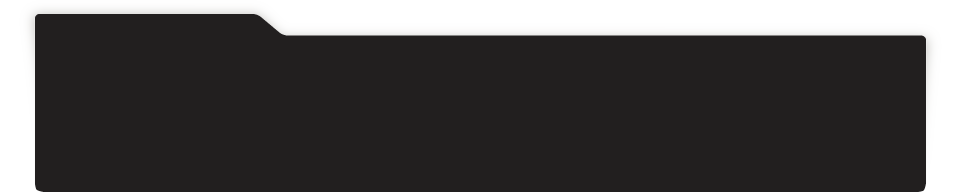
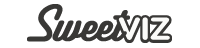
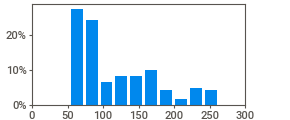
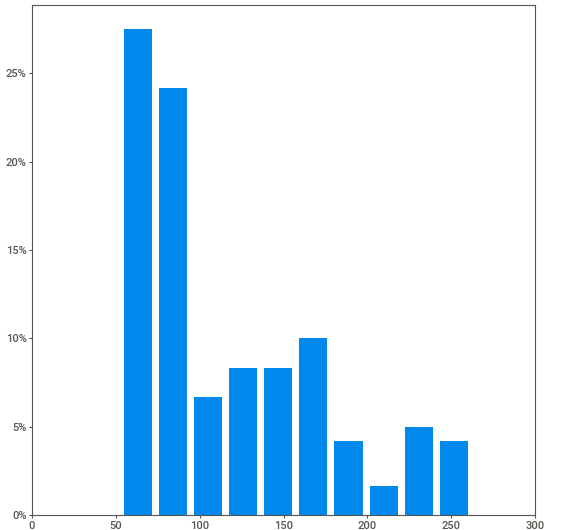
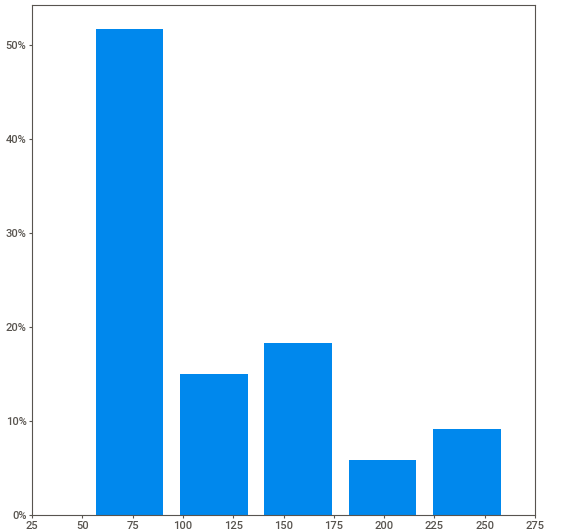
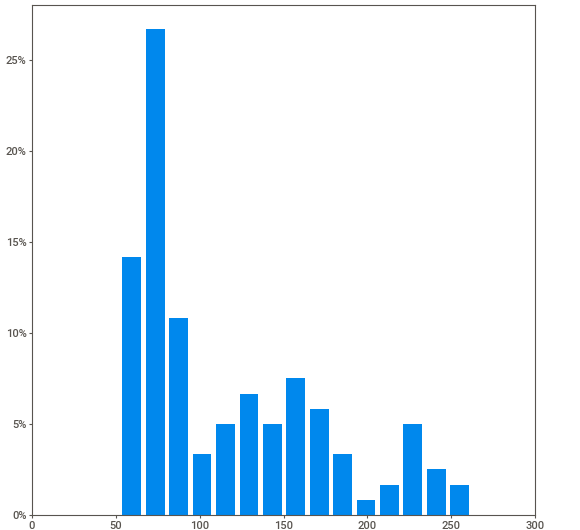
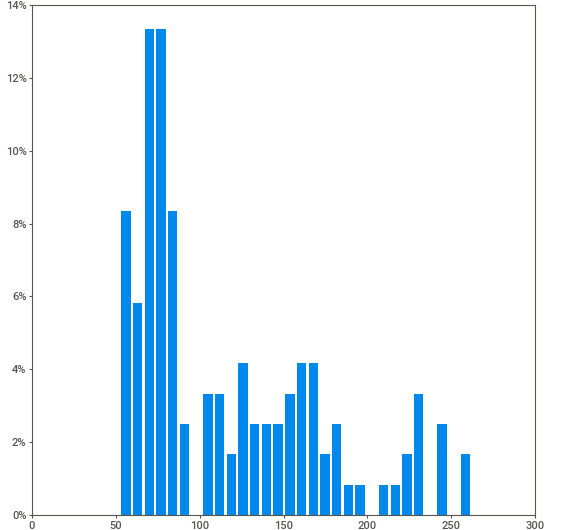
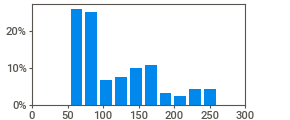
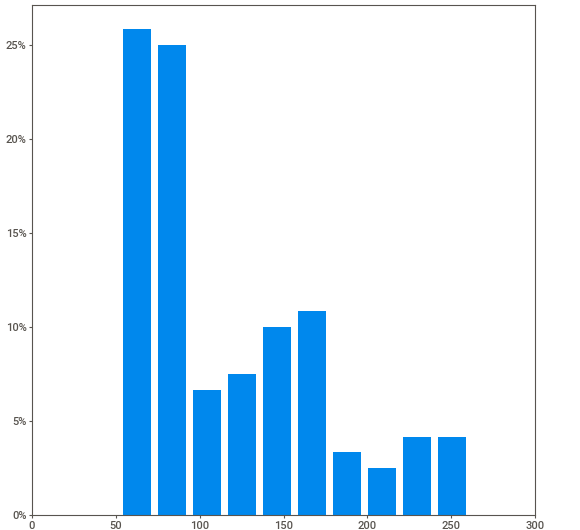
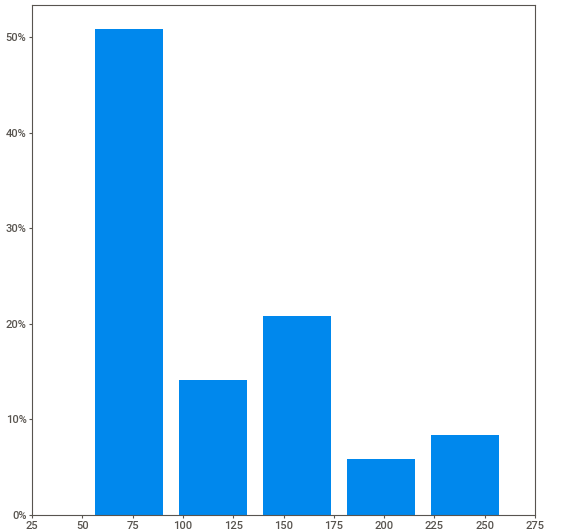
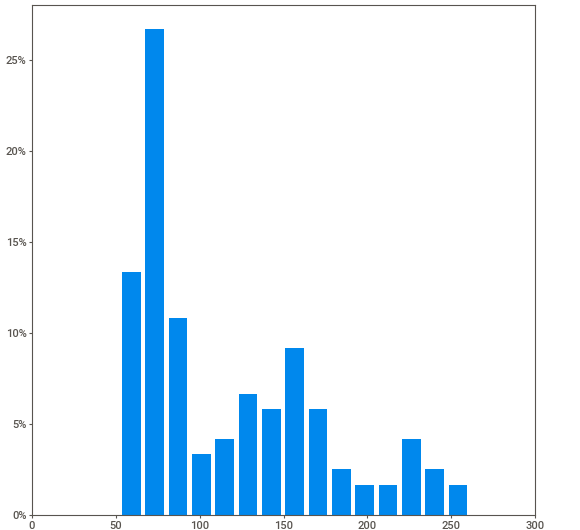
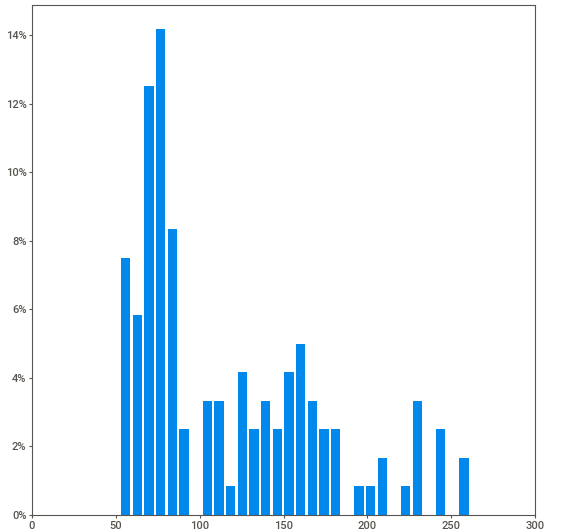
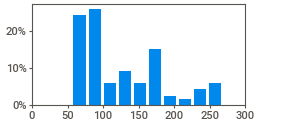
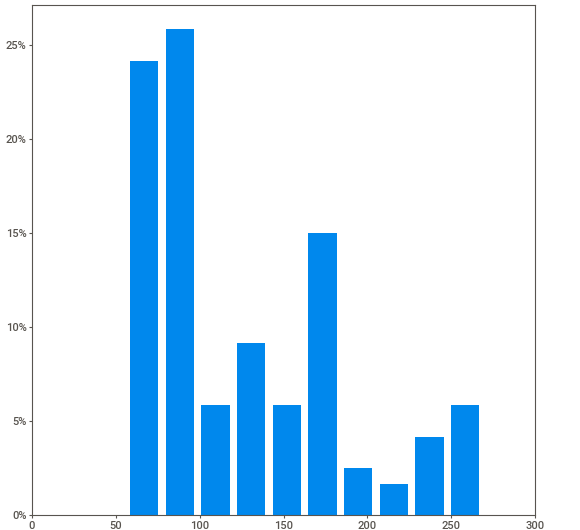
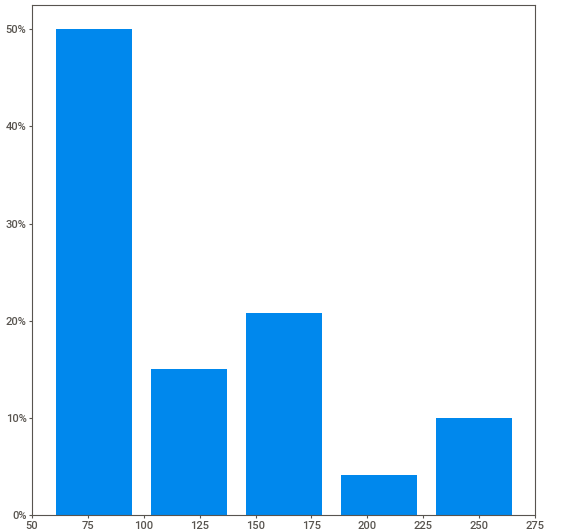
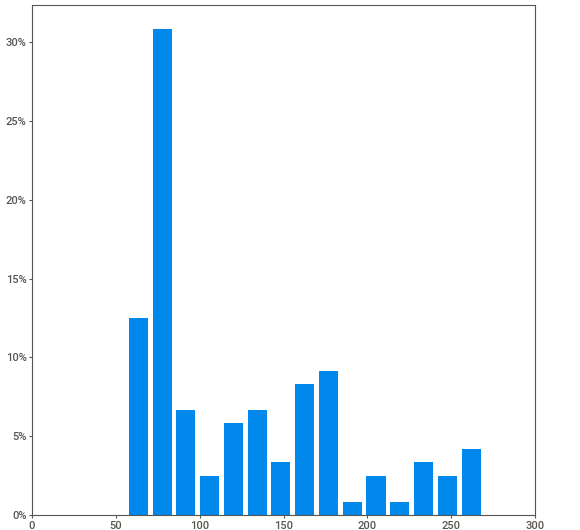
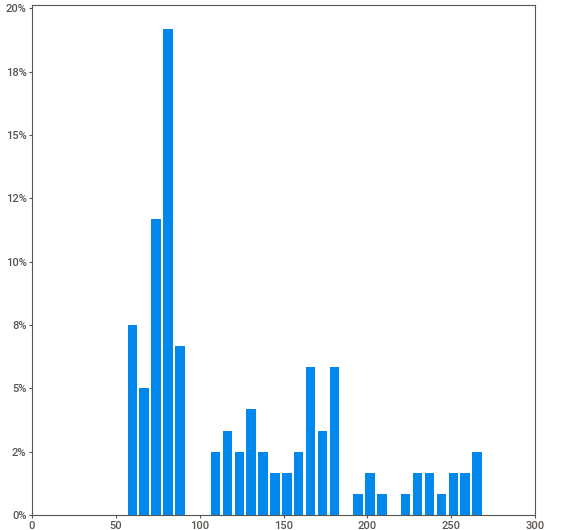
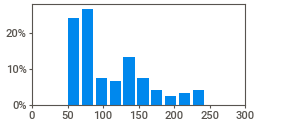
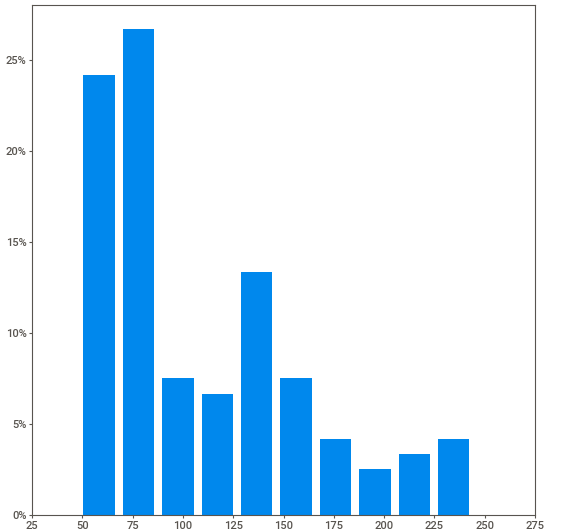
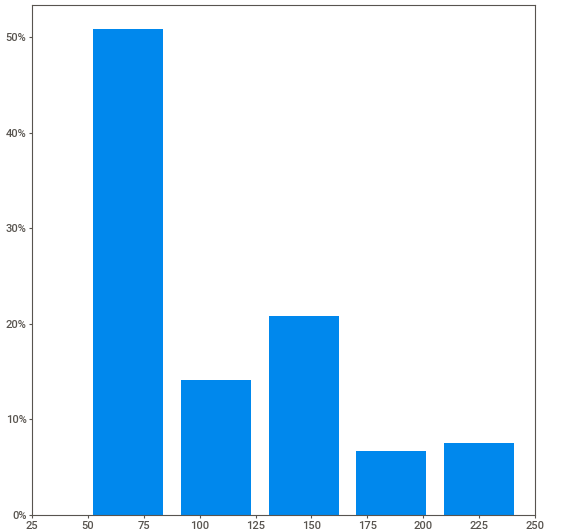
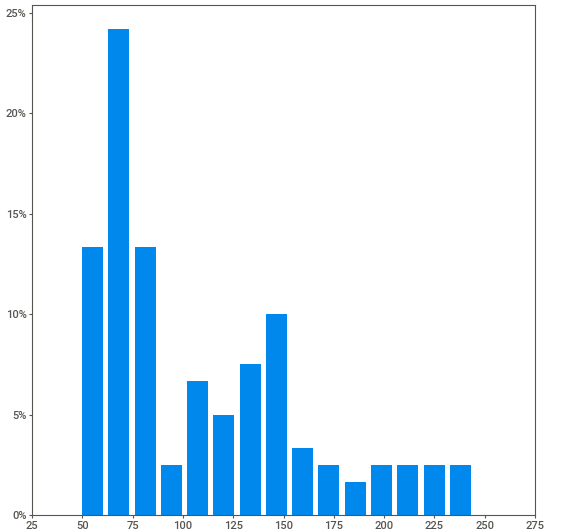
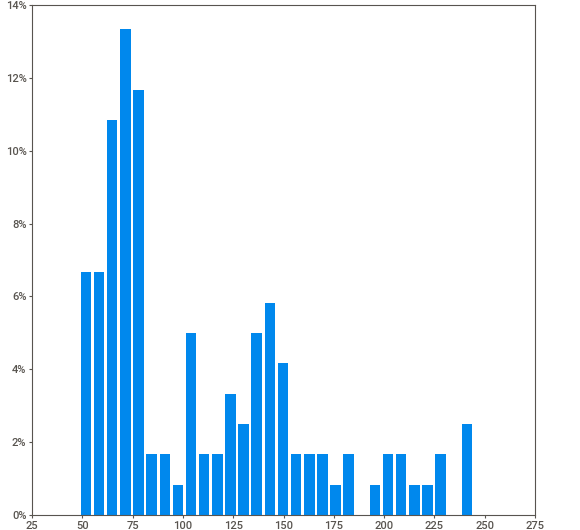
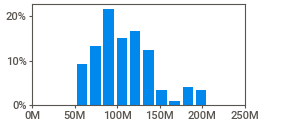
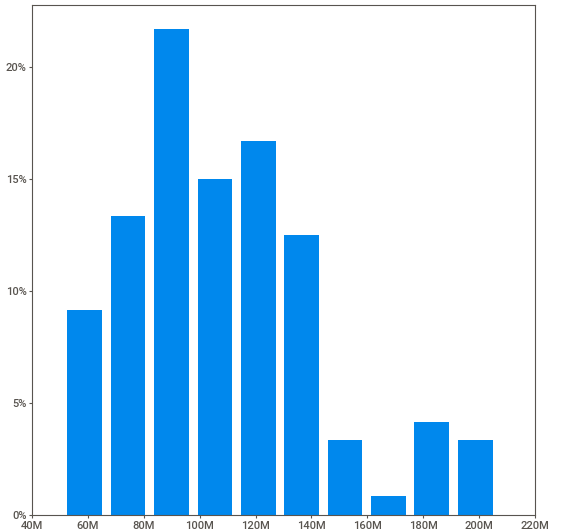
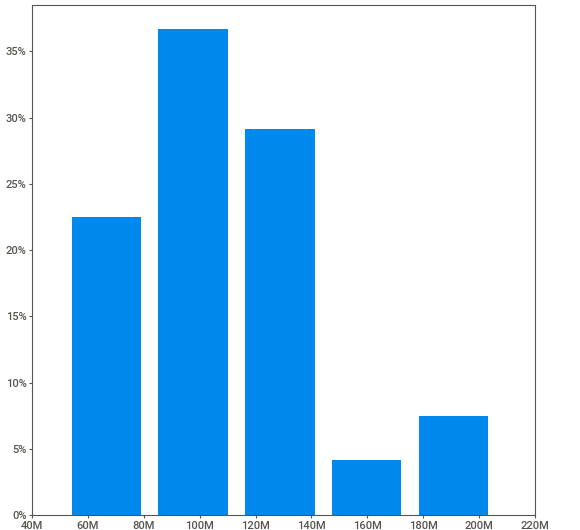
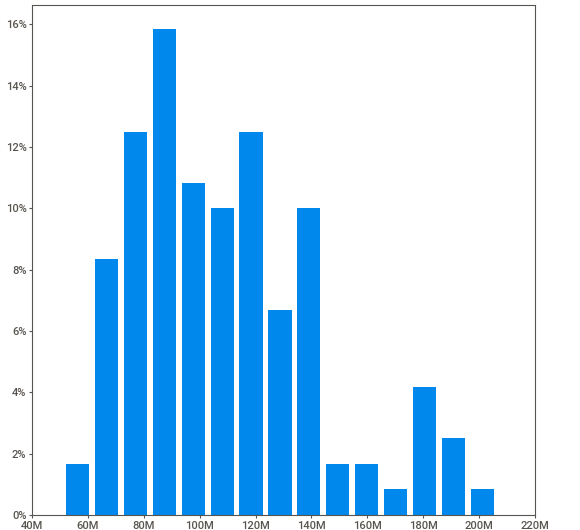
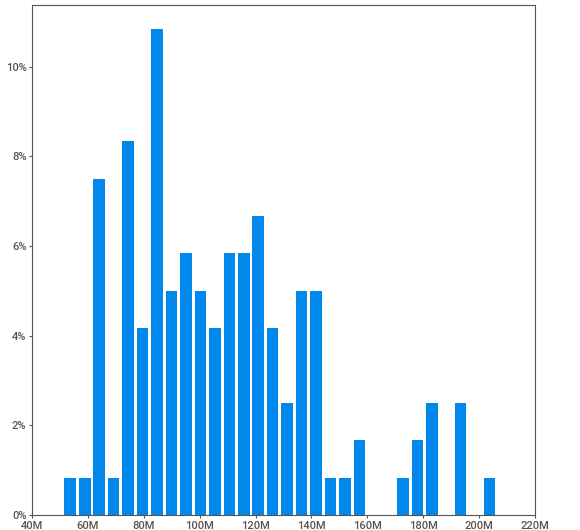
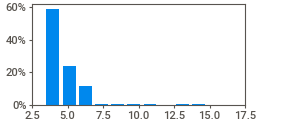
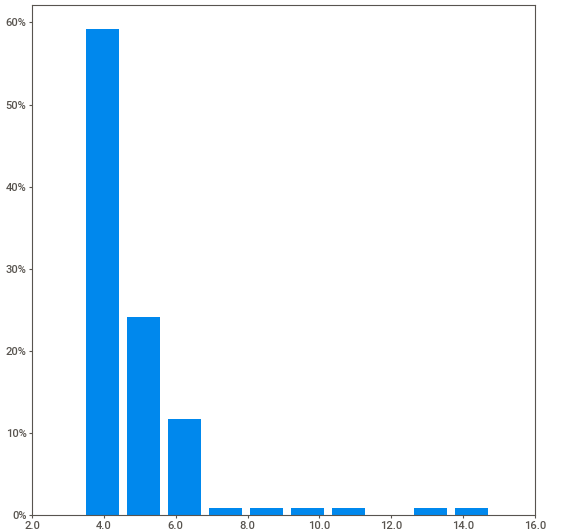
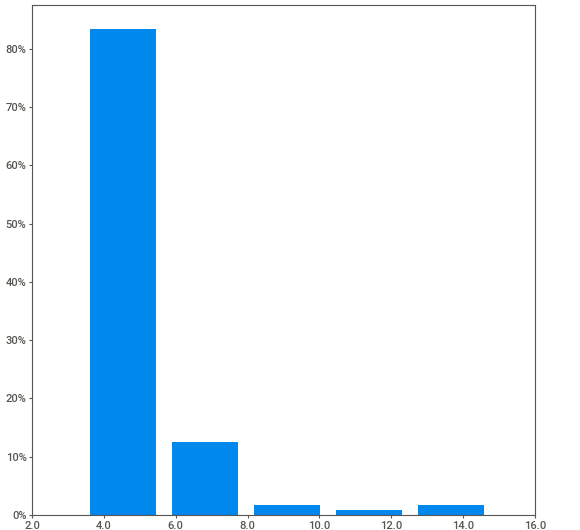
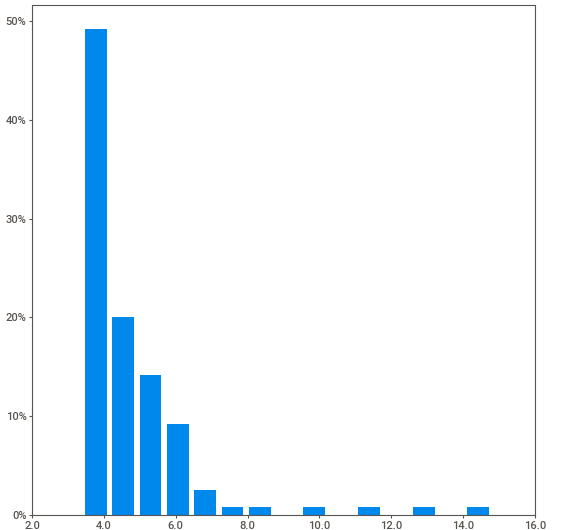
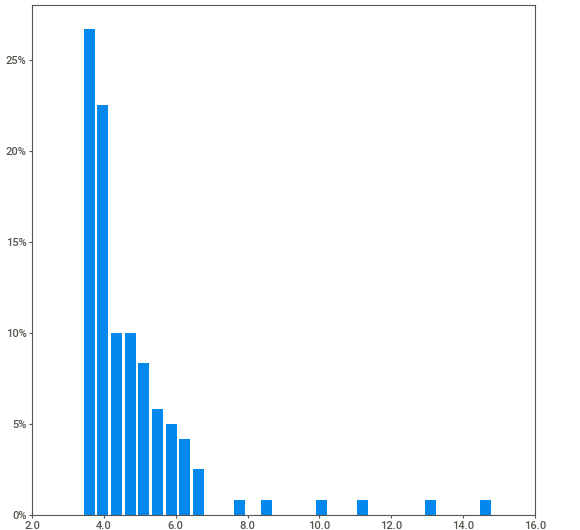
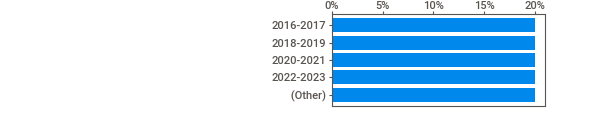
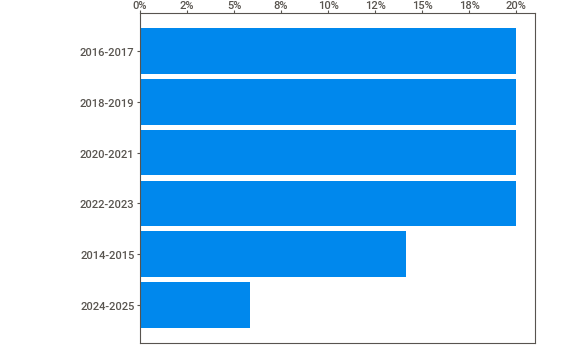
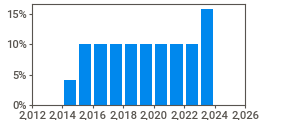
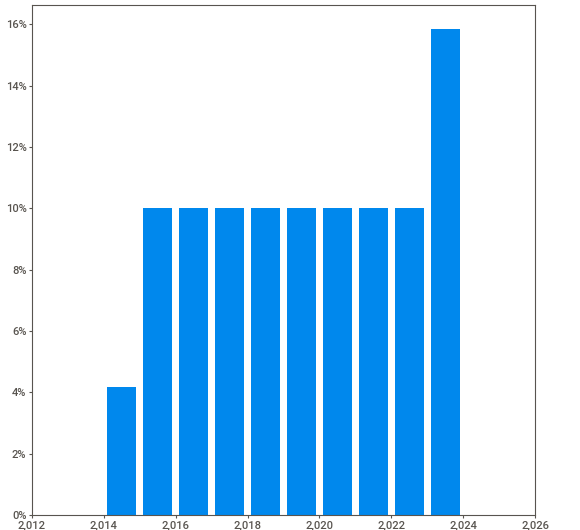
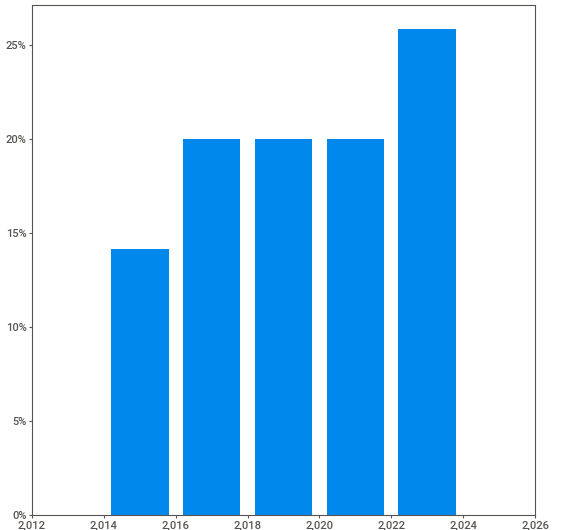
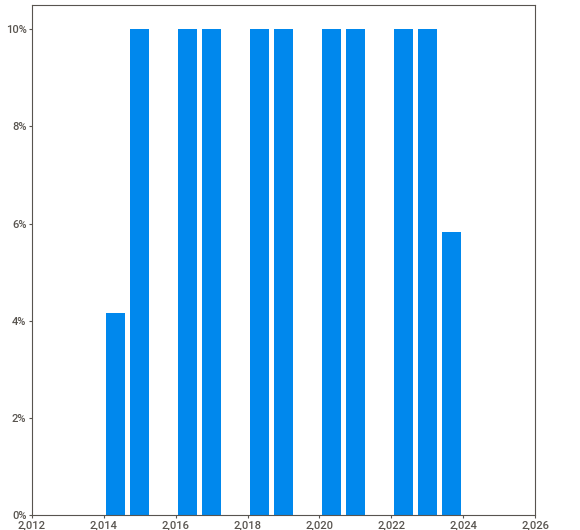
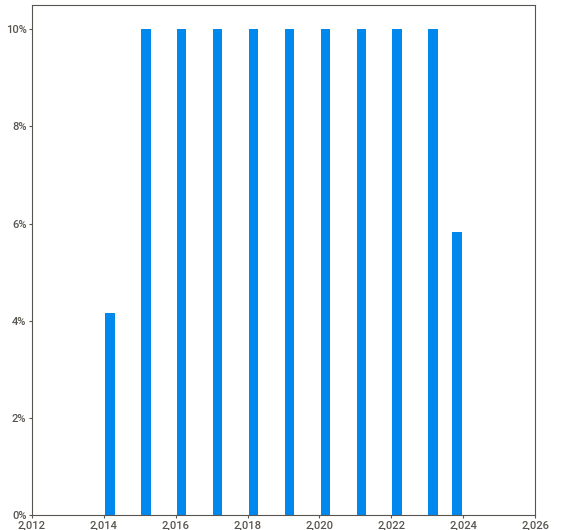
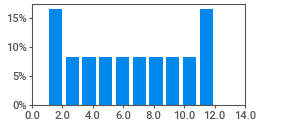
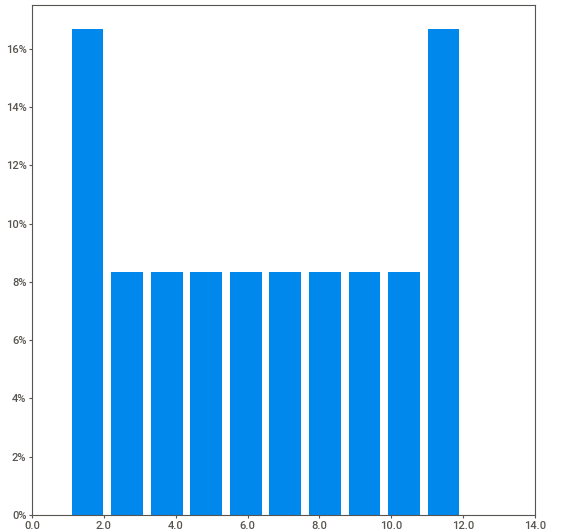
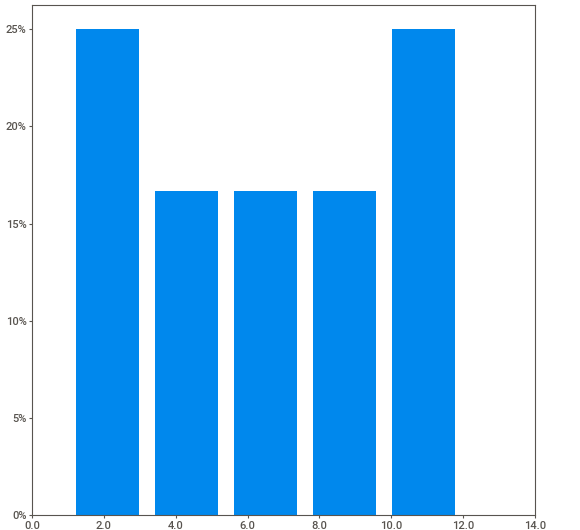
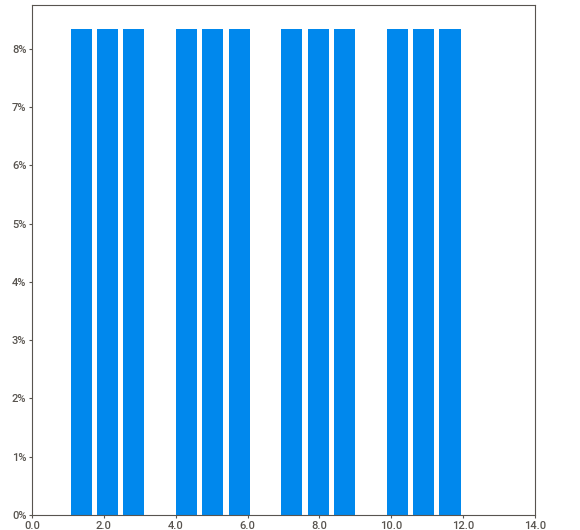
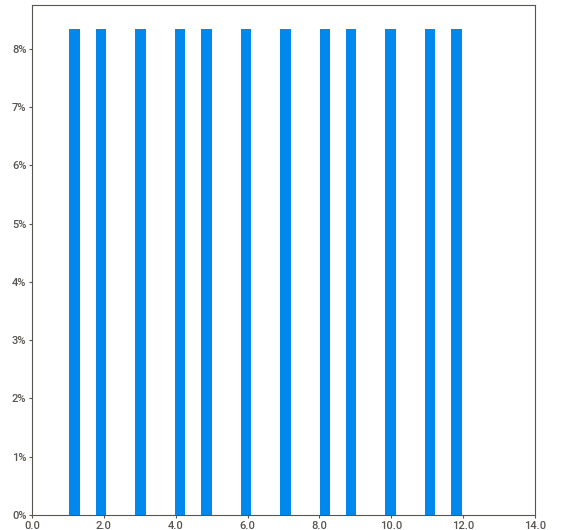
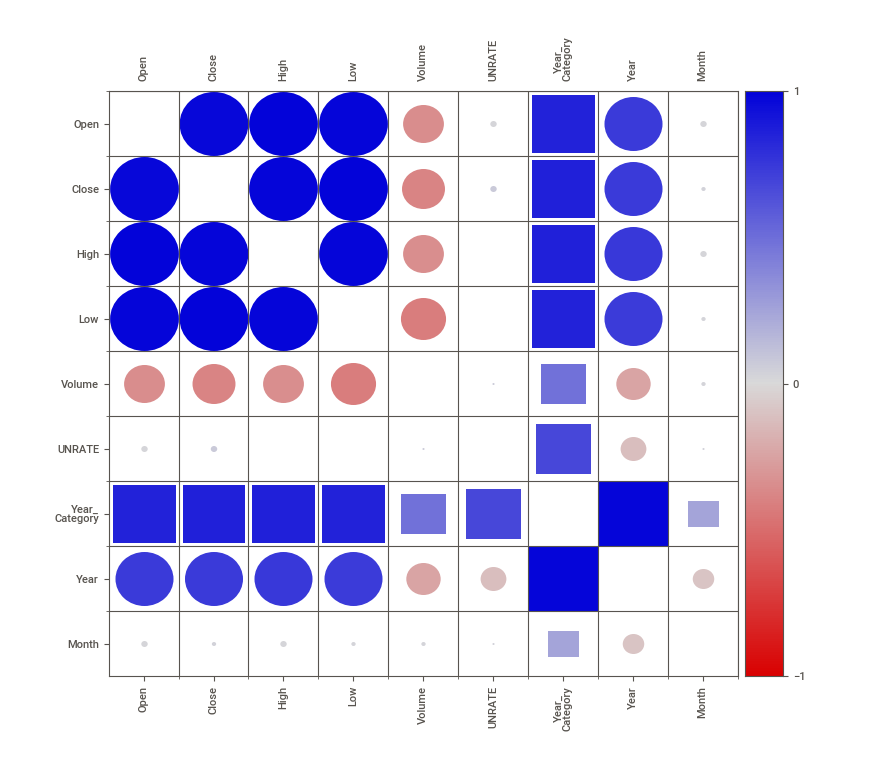
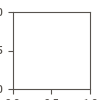

In [65]:
#This code displays the data profiling report
from IPython.display import display, HTML

# Read the content of the HTML file
with open('sweetviz_report.html', 'r') as f:
    html_content = f.read()

# Display the HTML content in the notebook
display(HTML(html_content))



In [66]:
#This code downloads the data profiling report
from google.colab import files
files.download("sweetviz_report.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusion**

My original hypothesis was that the unemployment rate would influence the close or open price of Target's stock, as a high or low unemployment rate should impact the sales of a company in Target's line of business. However, after performing a correlation analysis, I found that my hypothesis was false, as the variables are not related. I found a slight relationship between Target's volume and its close price, indicating that, to some extent, when the transaction volume is high, the price tends to decrease.